# Modelling gene regulatory networks

For this project we will be working towards understanding a [scientific paper](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.0040009) and reproduce their calculations. 

We will start reading parts of the paper and here I'm giving you some questions that point out some of the key ideas.

### Abstract

+ What are they proposing?
+ Where can be applied the proposed mechanism?

### Author Summary 
+ What is the cell cycle? 
+ What controls the timing and spatial organization of the cell cycle?
+ What are the most important regulators in Caulobacter?

Now, let's move for a moment to **Figure 1.** Read the description and identify the three cell cycle phases in the diagram. 

### KEGG PATHWAY Data
There are databases online which provide information of molecular interactions. Go to [KEGG](http://www.kegg.jp/kegg/pathway.html) and look at the classification of the data (Metabolism, Genetic Information Processing ...etc)

+ Which of the topics/subtopics do you find more interesting? Why?   

We will now search the pathway that we will be studying. On top of the website, in the box  bellow "Select prefix" make sure it says map and then on the box next to it write: caulobacter crescentus and click Go.  
This search will give you the entries that match your searching criteria. Click on the link below the Entry column (map0...). 
Click again on the link (map0...) next to Pathway map. You should now be seeing an image
Click on Pathway menu
Click 04112. Now you should be seeing the image but with some green color. 

+ How similar is it to Figure 1 of the paper? What about Figure 2? What are the differences?

Now, click on the Help button and identify some of the objects, interactions and relations you see in the map. 

Let's take a closer look to some of this components. Starting with the **DnaA** green box 

+ What other objects directly regulate it? Mention at least 3 and how they are related (for example, GcrA inhibits it) If you click on the box, what information do you see? Feel free to use the Help button. What is the definition?  


Go back to the map and do the same for **GcrA**, **CtrA**, **CcrM** and **DivK**


### Toy model
To get an idea of how this networks are translated to a differential equation and then analyze how the components evolve in time look at the following link [figure](http://www.nature.com/nrm/journal/v9/n10/fig_tab/nrm2503_F2.html)

The following code solves the system of differential equations

In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode

In [2]:
#define the right hand side equations
#fill with the values given by the figure information
def rhs(t, g):
    k1s = 2.0
    k2s= 2.0
    k3s= 15.0
    
    k1d=
    k2d=
    k3d=
    
    k21= 
    k31= 
    k32= 
    k13=  
    
    f = np.zeros(3)
    f[0] = k1s * (1.0/(1.0+ k13* g[2])) - k1d*g[0]
    f[1] = k2s * k21*g[0]/(1.0+ k21 * g[0]) - k2d*g[1]
    f[2] = 
    
    return f

In [11]:
def doint():
    intvode = ode(rhs).set_integrator('dop853', rtol=1.0e-12, atol=1.0e-12)
    # Initial values at t=0 
    g0 = [0.0, 0.0, 0.0]
    t0 = 0.0
    intvode.set_initial_value(g0, t0)
    time =  6.0
    # Interval at which to save the integration data
    save_dt = 1.0e-3 
    tm   = [t0]
    gene1  = [g0[0]]
    gene2  = [g0[1]]
    gene3  = [g0[2]]
    
    next_dt = save_dt
    min_dt = 1.0e-6
    # ierr = 0 (no error), 
    # ierr = 1 (integration reached time_year)
    # ierr = -1 (other error)
    ierr = 0 
    while (intvode.successful()):
        intvode.integrate(intvode.t + next_dt)
        tm.append(intvode.t)
        gene1.append(intvode.y[0])
        gene2.append(intvode.y[1])
        gene3.append(intvode.y[2])
        
        if intvode.t > time:
            break
            
    tm = np.array(tm)
    gene1 = np.array(gene1)
    gene2 = np.array(gene2)
    gene3 = np.array(gene3)
    
    if intvode.successful():
        ierr = 0
    else:
        ierr = -1
    return tm, gene1, gene2, gene3, ierr


In [12]:
t, g1, g2, g3, err = doint() #let's solve the system

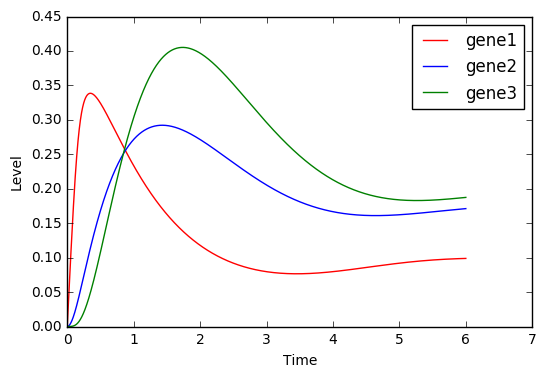

In [13]:
#plot the solutions
plt.plot(t, g1, 'r', label = 'gene1')
plt.plot(t, g2, 'b', label ='gene2')
plt.plot(t, g3, 'g', label = 'gene3')

#create the legend
plt.legend()

#label the axis
plt.xlabel('Time')
plt.ylabel('Level')